In [39]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [41]:
!pip install --upgrade bottleneck


In [42]:
df = pd.read_csv("C:/Users/aashr/ML_Project/survey lung cancer.csv")

In [45]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [49]:
df.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [51]:
#Purpose: Removes any leading/trailing whitespace from column names.
df.columns = df.columns.str.strip()

#A list of feature columns that are binary in nature and need to be cleaned/converted.
new_columns = ['SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 
                      'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 
                      'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 
                      'SWALLOWING DIFFICULTY', 'CHEST PAIN']
#Purpose: Converts feature values from {1, 2} to standard binary format {0, 1}.
for col in new_columns:
    if col in df.columns:
        df[col] = df[col].map({2: 1, 1: 0})

        #Converts the target variable from text to binary
df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'YES': 1, 'NO': 0})
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,M,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,F,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,M,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,F,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


In [53]:
x = df[['AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'FATIGUE', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN']]
y = df['LUNG_CANCER']
#Creates a copy of x and scales the AGE feature by dividing by 100.
x_scaled = x.copy()
x_scaled["AGE"] = x_scaled["AGE"] / 100
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y, test_size = 0.2)

In [55]:
x_scaled.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,FATIGUE,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,0.69,0,1,1,1,1,1,1,1,1
1,0.74,1,0,0,1,0,0,1,1,1
2,0.59,0,0,0,1,0,1,1,0,1
3,0.63,1,1,1,0,1,0,0,1,1
4,0.63,0,1,0,0,0,1,1,0,0



1.Logistic Regression is a machine learning algorithm used for binary classification — it predicts one of two possible outcomes (e.g., cancer or no cancer).

reason:
Simple, fast, and works well when the relationship between features and the target is linear.
Helps understand the influence of each feature on the prediction.


2.A Decision Tree is a model that makes predictions by asking a series of yes/no questions, like a flowchart.
How it works:
It starts at the top (root) and splits the data into branches based on the most important features (like "Is the patient a smoker?").
It keeps splitting until it reaches a final decision (like "Cancer = Yes" or "No").

Reason:
Very easy to understand and explain.
Shows which features (symptoms) are most important in making a prediction.
 it handles different types of data well.


3.Random Forest is an ensemble machine learning algorithm that builds multiple decision trees and combines their outputs to make a more accurate and stable prediction.
How it works:
Each tree gives a prediction (like "Cancer" or "No Cancer").
The forest takes a majority vote from all trees to make the final decision.
It also uses random data and features for each tree to avoid overfitting.

reason:
Works well even if the data is noisy or has missing patterns.
Reduces the risk of overfitting and handles complex relationships in the data

These models were selected for their balance of interpretability, predictive power, and suitability for the binary, symptom-based nature of lung cancer diagnosis

# Logistic Regression

In [59]:
#Initializes a Logistic Regression model.
#max_iter=500: Allows up to 500 iterations to ensure convergence.
#class_weight='balanced': Adjusts weights to handle class imbalance,
#making sure minority class (lung cancer cases) is not ignored.

log_reg_model = LogisticRegression(max_iter=500, class_weight='balanced')

#Trains the model using the training data (x_train, y_train).
log_reg_model.fit(x_train, y_train)

#Makes predictions on the test set.
y_pred = log_reg_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score:{f1:.4f}")

Accuracy: 0.8387
Precision: 0.9783
Recall: 0.8333
F1 Score:0.9000


In [61]:
#Define a Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression())
])

#Set Up Hyperparameter Grid
param_grid = {
    'log_reg__C': [0.01, 0.1, 1, 10, 100],
    'log_reg__penalty': ['l1', 'l2'],
    'log_reg__solver': ['liblinear'],
    'log_reg__class_weight': [None, 'balanced']
}

#Perform Grid Search Cross Validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)
#Evaluate the Best Model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)


#Print Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score:{f1:.4f}")

Accuracy: 0.8871
Precision: 0.8983
Recall: 0.9815
F1 Score:0.9381


# Random Forest Classifier

In [64]:
random_classifier_model = RandomForestClassifier(n_estimators = 10,class_weight='balanced', random_state = 0) 
random_classifier_model.fit(x_train, y_train)
y_pred = random_classifier_model.predict(x_test)
random_classifier_model.score(x_test, y_test)


y_pred = log_reg_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score:{f1:.4f}")

Accuracy: 0.8387
Precision: 0.9783
Recall: 0.8333
F1 Score:0.9000


In [66]:
importances = random_classifier_model.feature_importances_
print(importances)

[0.22880837 0.04233807 0.07110463 0.04448429 0.1015876  0.17334163
 0.14760901 0.06158571 0.09285881 0.03628189]


In [68]:
param_grid = {
    'n_estimators': [200,100,50], 
    'max_depth': [30,20,10],
    'min_samples_split': [20, 15, 10],
    'min_samples_leaf': [2, 4, 8],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False] 
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                           param_grid=param_grid,
                           cv=2,
                           verbose=2,
                           n_jobs=1)

grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score:{f1:.4f}")

Fitting 2 folds for each of 324 candidates, totalling 648 fits
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200;

# Decision Tree Classifier

In [70]:
dt_model_classifier = DecisionTreeClassifier(random_state=0)
dt_model_classifier.fit(x_train, y_train)
y_pred = dt_model_classifier.predict(x_test)
accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score:{f1:.4f}")

Accuracy: 0.8548
Precision: 0.8814
Recall: 0.9630
F1 Score:0.9204


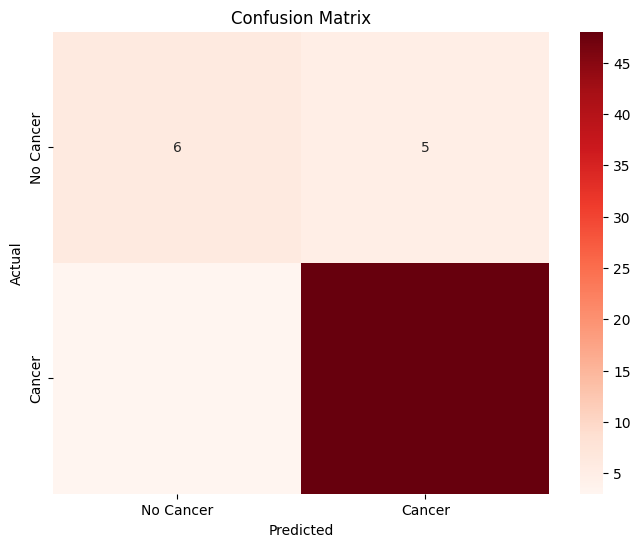

In [20]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=["No Cancer", "Cancer"], yticklabels=["No Cancer", "Cancer"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


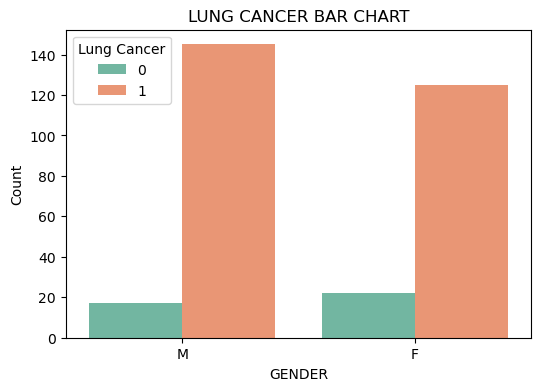

In [66]:
plt.figure(figsize=(6, 4))
sns.countplot(x='GENDER', hue='LUNG_CANCER', data=df, palette='Set2')
plt.title('LUNG CANCER BAR CHART')
plt.xlabel('GENDER')
plt.ylabel('Count')
plt.legend(title='Lung Cancer')
plt.show()

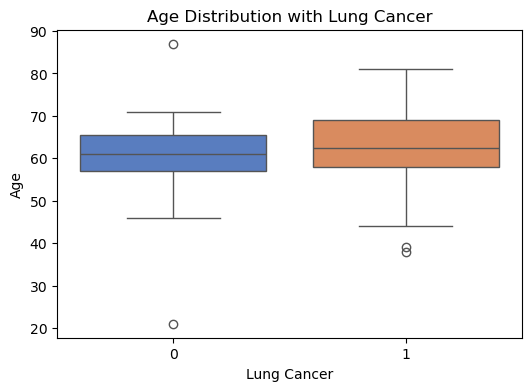

In [68]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='LUNG_CANCER', y='AGE', data=df, hue='LUNG_CANCER', palette='muted', legend=False)
plt.title('Age Distribution with Lung Cancer')
plt.xlabel('Lung Cancer')
plt.ylabel('Age')
plt.show()

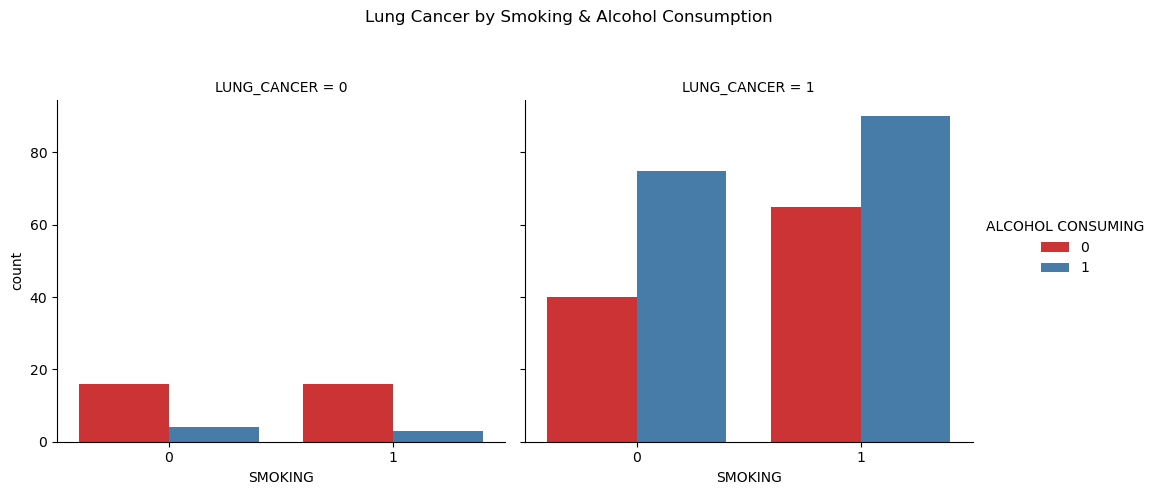

In [70]:
sns.catplot(x='SMOKING', hue='ALCOHOL CONSUMING', col='LUNG_CANCER',
            kind='count', data=df, palette='Set1')
plt.subplots_adjust(top=0.8)
plt.suptitle('Lung Cancer by Smoking & Alcohol Consumption')
plt.show()